### Create Latitude and Longitude Combinations

### Module 6.1.4

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. In a new cell in the WeatherPy.ipynb file, add the following code and run the cell.

In [3]:
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

coordinates

[(-72.25645272728869, 90.2760218956762),
 (-54.32690218110337, -42.04632301967882),
 (-83.6842174163008, -60.43167645059978),
 (53.984195571931565, 75.8281841787381),
 (-6.03473741239425, -67.90576198186982),
 (26.36752129054574, -107.3713268716012),
 (-2.108848689238343, 117.39968437235461),
 (-70.47241165891428, 10.029785886957825),
 (-68.99594856675972, 35.83689499418384),
 (63.18885780543076, 115.70430546323041),
 (-75.43043675300551, -10.071149704147984),
 (74.84552816616659, -168.64308641404813),
 (74.46162079448038, 140.67902531800826),
 (43.15963190447425, -46.17366883053677),
 (-77.23642169878742, -80.21960976879664),
 (35.399713632985595, -129.30288668380666),
 (75.9801660164513, -31.640448391884377),
 (-66.53627992794642, -64.62762234311589),
 (82.85846760434737, -118.38363931569157),
 (-32.203419981849535, 148.63643990627867),
 (33.85526190531246, -171.29884603350652),
 (79.73790571520013, 39.51195399856644),
 (-75.9561140948434, -45.24058662902269),
 (-43.90840238096247, -

We are making great progress. With our list of random latitudes and longitudes, we'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module.

Since we haven't worked with the citipy module yet, let's import and test it. Citipy doesn't come with the Anaconda module, so we'll install it in our PythonData environment.

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### First, import the citipy module in our WeatherPy file

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

### Some of this code should look familiar, but let's break it down:

1. We create a cities list to store city names.
2. We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
3. We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. 

We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

## 6.2.6 Get the City Weather Data

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d170bf6ae0d5b7630c4a6b899acb279a


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bolshegrivskoye
City not found. Skipping...
Processing Record 5 of Set 1 | jutai
Processing Record 6 of Set 1 | guadalupe y calvo
Processing Record 7 of Set 1 | balikpapan
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | almaznyy
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | lavrentiya
Processing Record 13 of Set 1 | deputatskiy
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | ukiah
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | dubbo
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | tumannyy
City not found. Skipping...
Processing Reco

Processing Record 38 of Set 4 | domoni
Processing Record 39 of Set 4 | luba
Processing Record 40 of Set 4 | mercedes
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | khandyga
Processing Record 43 of Set 4 | melo
Processing Record 44 of Set 4 | toftir
City not found. Skipping...
Processing Record 45 of Set 4 | port hardy
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | el alto
Processing Record 48 of Set 4 | yamethin
Processing Record 49 of Set 4 | araouane
Processing Record 50 of Set 4 | nemuro
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | kamaishi
Processing Record 3 of Set 5 | nsanje
Processing Record 4 of Set 5 | prudnik
Processing Record 5 of Set 5 | jacqueville
Processing Record 6 of Set 5 | harper
Processing Record 7 of Set 5 | saleaula
City not found. Skipping...
Processing Record 8 of Set 5 | gamba
Processing Record 9 of Set 5 | vestmannaeyjar
Processing Record 10 of Set 5 | dunedin
Processing Record 11 o

City not found. Skipping...
Processing Record 29 of Set 8 | alvaraes
Processing Record 30 of Set 8 | nhulunbuy
Processing Record 31 of Set 8 | korsor
Processing Record 32 of Set 8 | portland
Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | tarudant
City not found. Skipping...
Processing Record 35 of Set 8 | ayagoz
Processing Record 36 of Set 8 | pinar del rio
Processing Record 37 of Set 8 | san pedro
Processing Record 38 of Set 8 | kangaatsiaq
Processing Record 39 of Set 8 | sosua
Processing Record 40 of Set 8 | ambulu
Processing Record 41 of Set 8 | steinbach
Processing Record 42 of Set 8 | tabou
Processing Record 43 of Set 8 | taonan
Processing Record 44 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 45 of Set 8 | mazeikiai
Processing Record 46 of Set 8 | ambovombe
Processing Record 47 of Set 8 | weyburn
Processing Record 48 of Set 8 | buala
Processing Record 49 of Set 8 | beni suef
Processing Record 50 of Set 8 | nyurba
Processing Record 1

Processing Record 16 of Set 12 | klatovy
Processing Record 17 of Set 12 | bayir
Processing Record 18 of Set 12 | mitu
Processing Record 19 of Set 12 | spittal
Processing Record 20 of Set 12 | rio gallegos
Processing Record 21 of Set 12 | hambantota
Processing Record 22 of Set 12 | bratsk
Processing Record 23 of Set 12 | vilyuysk
Processing Record 24 of Set 12 | jiaohe
Processing Record 25 of Set 12 | burtunay
Processing Record 26 of Set 12 | parthenay
Processing Record 27 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 28 of Set 12 | mackay
Processing Record 29 of Set 12 | grand-santi
Processing Record 30 of Set 12 | san andres
Processing Record 31 of Set 12 | victoria
Processing Record 32 of Set 12 | kjollefjord
Processing Record 33 of Set 12 | podporozhye
Processing Record 34 of Set 12 | georgiyevka
Processing Record 35 of Set 12 | susehri
Processing Record 36 of Set 12 | hamilton
Processing Record 37 of Set 12 | the pas
Processing Record 38 of Set 12 | zyr

## 6.2.7 Create a Dataframe of City Weather Data

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,73.00,54,43,7.00,AU,2020-12-23 18:05:45
1,Mar Del Plata,-38.00,-57.56,91.40,26,0,21.92,AR,2020-12-23 18:04:46
2,Ushuaia,-54.80,-68.30,60.80,38,40,23.04,AR,2020-12-23 18:04:46
3,Jutai,-5.18,-68.90,84.51,75,99,2.86,BR,2020-12-23 18:05:45
4,Guadalupe Y Calvo,26.10,-106.97,59.11,29,13,8.01,MX,2020-12-23 18:05:46
5,Balikpapan,-1.27,116.83,76.93,89,100,3.15,ID,2020-12-23 18:05:46
6,Hermanus,-34.42,19.23,70.00,69,15,5.99,ZA,2020-12-23 18:05:46
7,Port Alfred,-33.59,26.89,69.01,86,23,8.99,ZA,2020-12-23 18:05:47
8,Almaznyy,48.04,40.05,24.80,92,90,13.42,RU,2020-12-23 18:05:47
9,Cape Town,-33.93,18.42,70.00,77,75,10.29,ZA,2020-12-23 18:04:50


In [14]:
# Reorder the columns in the order you want them to appear

new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-12-23 18:05:45,-33.65,115.33,73.00,54,43,7.00
1,Mar Del Plata,AR,2020-12-23 18:04:46,-38.00,-57.56,91.40,26,0,21.92
2,Ushuaia,AR,2020-12-23 18:04:46,-54.80,-68.30,60.80,38,40,23.04
3,Jutai,BR,2020-12-23 18:05:45,-5.18,-68.90,84.51,75,99,2.86
4,Guadalupe Y Calvo,MX,2020-12-23 18:05:46,26.10,-106.97,59.11,29,13,8.01
5,Balikpapan,ID,2020-12-23 18:05:46,-1.27,116.83,76.93,89,100,3.15
6,Hermanus,ZA,2020-12-23 18:05:46,-34.42,19.23,70.00,69,15,5.99
7,Port Alfred,ZA,2020-12-23 18:05:47,-33.59,26.89,69.01,86,23,8.99
8,Almaznyy,RU,2020-12-23 18:05:47,48.04,40.05,24.80,92,90,13.42
9,Cape Town,ZA,2020-12-23 18:04:50,-33.93,18.42,70.00,77,75,10.29


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude Vs. Temperature

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [47]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1608752348.366765

In [48]:
# Use string format method to reformat the datetime stamp.
today = time.strftime("%x")
today

'12/23/20'

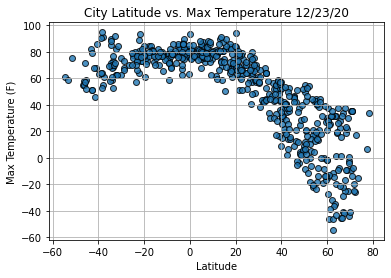

In [49]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

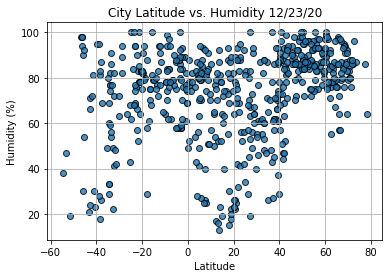

In [50]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. cloudiness

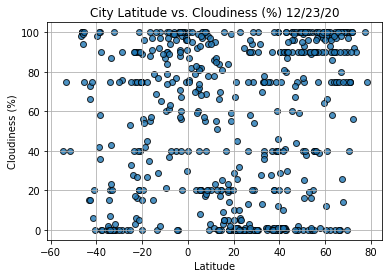

In [51]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Lattitude vs. Wind Speed

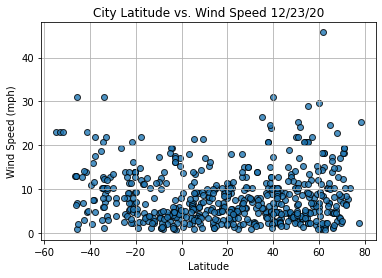

In [52]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.1 Use Linear Regression to Find the Relationship Between Varibales

In [53]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [54]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [55]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")


y = -0.45x + 92.94
The p-value is: 0.011


In [56]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

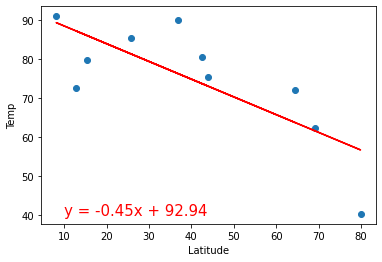

In [57]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

### Create a Linear Regression Function 

In [58]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [59]:
index13 = city_data_df.loc[13]
index13

City                        Ukiah
Country                        US
Date          2020-12-23 18:05:49
Lat                         39.15
Lng                       -123.21
Max Temp                    51.01
Humidity                       86
Cloudiness                      1
Wind Speed                   3.36
Name: 13, dtype: object

### Create the Hemisphere Dataframes

In [60]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Guadalupe Y Calvo,MX,2020-12-23 18:05:46,26.10,-106.97,59.11,29,13,8.01
8,Almaznyy,RU,2020-12-23 18:05:47,48.04,40.05,24.80,92,90,13.42
10,Lavrentiya,RU,2020-12-23 18:05:48,65.58,-171.00,28.15,98,100,13.82
11,Deputatskiy,RU,2020-12-23 18:05:48,69.30,139.90,-24.90,87,100,3.24
12,Torbay,CA,2020-12-23 18:05:48,47.67,-52.73,37.40,86,75,12.75
...,...,...,...,...,...,...,...,...,...
566,Rovaniemi,FI,2020-12-23 18:08:07,66.50,25.72,32.00,97,90,10.29
567,Tambacounda,SN,2020-12-23 18:08:07,13.75,-13.76,91.40,13,0,9.17
568,Yarmouth,US,2020-12-23 18:08:07,41.71,-70.23,41.00,44,1,8.05
570,Iracoubo,GF,2020-12-23 18:08:08,5.48,-53.20,80.11,86,93,11.74


In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


### Perform Linear Regression on the Maximum Temperature for Northern Hemisphere

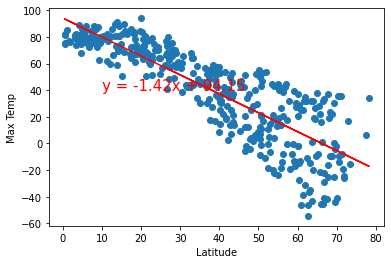

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

### Perform the Linear Regression on the Maximum Temperature for the Southern Hemisphere

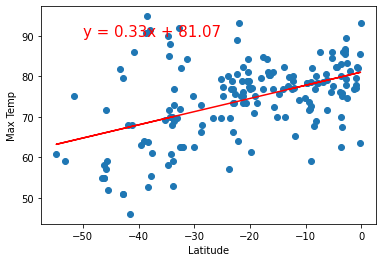

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

## Findings

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 



### 6.4.3 Find the Correlation Betwen Latitude and Percent Huminidity 



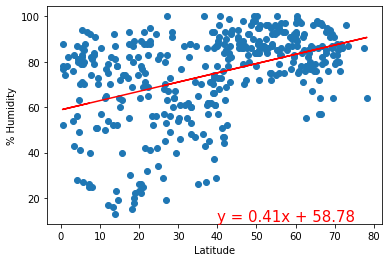

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

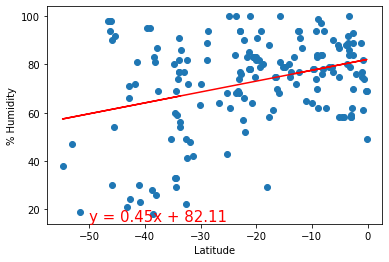

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

## Findings

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

# Find the Correlation Between Latitude and Percent Cloudiness

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

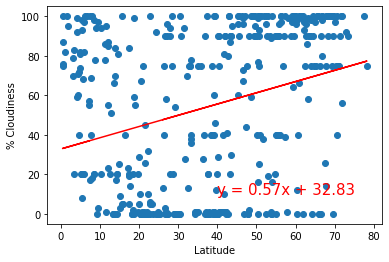

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

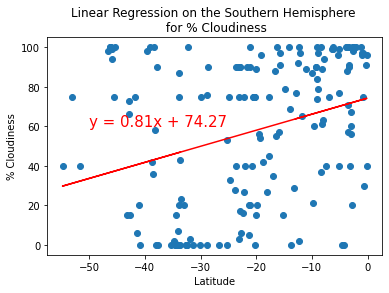

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

#Findings

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

# 6.4.5 Find the Correlation Between Latitude and wind Speed

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

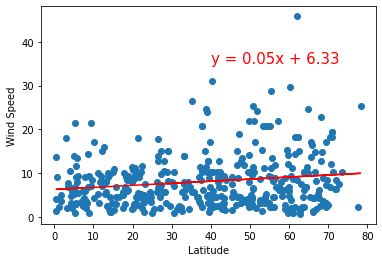

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

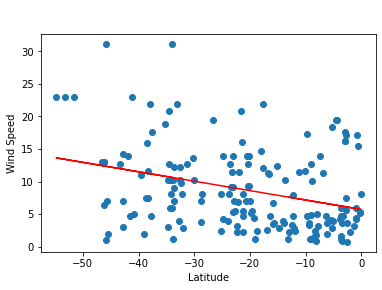

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

# Findings

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 